# 🎬 Netflix Data Analysis & Visualization (Data Visualization and EDA Project)

## As a highly popular content platform, Netflix offers wide range of movies and TV shows for its target audiences. This project undertakes Data Visualization of the 'Netflix Movies and TV shows' dataset to derive significant and useful insights.

## 🎯 Objective:
To analyze Netflix's content library to derive meaningful insights using Python.

## ✨ Key Activities:
- Feature-wise visualizations were created, leading to the discovery of useful insights.

- These insights are presented through a storytelling approach.

- These analysis aim to understand the behavioral patterns of directors and actors that are listed on Netflix.

Furthermore, this project involves a bit more interesting analysis and observations.

***
# 💡 Description of Feature in the Dataset:

**show_id** - Unique ID for every Movie / TV show

**type** - An identifier indicating whether the content is a movie or a TV show.

**title** - The title of the movie or TV show.

**director** - The director of the movie.

**cast** - The actors involved in the movie or show.

**country** - The country where the movie or show was produced.

**date_added** - The date when the movie or show was added to Netflix.

**release_year** - The actual year the movie or show was released.

**rating** - The TV content rating of the movie or show.

**duration** - The total duration of the content, either in minutes (for movies) or the number of seasons (for TV shows).

**listed_in** - The genre(s) the movie or show is categorized under.

**description** - A brief summary of the movie or show.
***

In [1]:
# importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Load dataset based on environment
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    file_path = '/content/drive/MyDrive/netflix_titles.csv'  # Enter the file path in drive


else:
    file_path = "C:\\Users\\HP\\Downloads\\netflix_titles.csv\\netflix_titles.csv" # Local file path

# Read the file
raw_df = pd.read_csv(file_path)
df = raw_df.copy()  # created a copy of the original dataset.
pd.set_option('display.max_columns', None)

In [2]:
df.head() # displaying initial rows.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info() # getting the information of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum() # checking the sum of the null values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
for feature in df.columns:
    print("Unique values in the feature '{}' are {}".format(feature, df[feature].nunique())) # printing the count of unique values of feature

Unique values in the feature 'show_id' are 8807
Unique values in the feature 'type' are 2
Unique values in the feature 'title' are 8807
Unique values in the feature 'director' are 4528
Unique values in the feature 'cast' are 7692
Unique values in the feature 'country' are 748
Unique values in the feature 'date_added' are 1767
Unique values in the feature 'release_year' are 74
Unique values in the feature 'rating' are 17
Unique values in the feature 'duration' are 220
Unique values in the feature 'listed_in' are 514
Unique values in the feature 'description' are 8775


In [6]:
categoricalFeat = [feature for feature in df.columns if df[feature].dtypes == 'O'] # capturing categorical features
print('Categorical features are: {}'.format(categoricalFeat))  # printing the categorical features

Categorical features are: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


In [7]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip()) # converting 'date_added' feature into a datetime variable
df['date_added_year'] = df['date_added'].dt.year # creating a new column to store date_added year
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          8807 non-null   object        
 1   type             8807 non-null   object        
 2   title            8807 non-null   object        
 3   director         6173 non-null   object        
 4   cast             7982 non-null   object        
 5   country          7976 non-null   object        
 6   date_added       8797 non-null   datetime64[ns]
 7   release_year     8807 non-null   int64         
 8   rating           8803 non-null   object        
 9   duration         8804 non-null   object        
 10  listed_in        8807 non-null   object        
 11  description      8807 non-null   object        
 12  date_added_year  8797 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


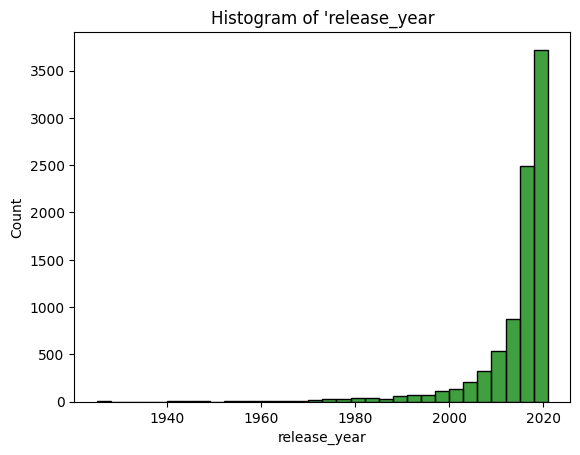

In [8]:
sns.histplot(x = df['release_year'], binwidth=3, color = 'green') # creating a histogram of release_year
plt.title("Histogram of 'release_year")
plt.show()

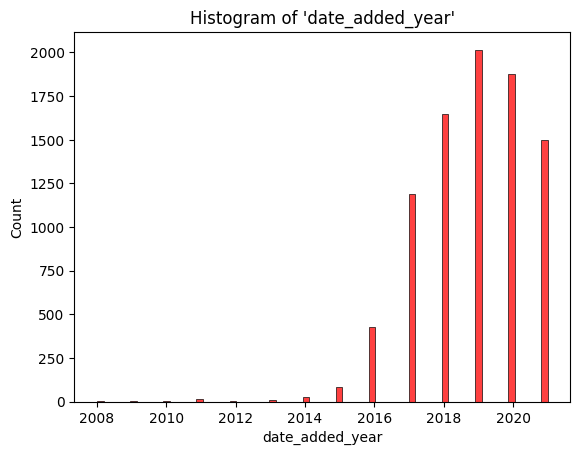

In [9]:
sns.histplot(x = df['date_added_year'],color = 'red') # created a histplot of date _added_year
plt.title("Histogram of 'date_added_year'")
plt.show()

## Key observations from the above histplots:

- ###  There is a clear concentration of content released in the year 2015 to 2020 on Netflix, that means - the trend of making movies and TV shows for OTT platforms (especially for Netflix ) had boomed in these years.

- ### The histogram of date_added_year shows a sudden rise in the content which was featured on netflix from 2019 to 2020. Since in the year 2019 the COVID-19 pandemic was emerged and the people stayed home during the lock down, enormous amount of content was added on Netflix which was advantageous for both Netflix and the entertainment industry.

In [10]:
for feature in categoricalFeat: # printing the unique values of the categorical features
    print("The number of unique categories in '{}' feature are {} which include: {}\n".format(feature, df[feature].nunique(), df[feature].value_counts().sort_values().index))

The number of unique categories in 'show_id' feature are 8807 which include: Index(['s15', 's16', 's17', 's18', 's19', 's20', 's21', 's22', 's23', 's8792',
       ...
       's8780', 's8781', 's8782', 's13', 's12', 's11', 's10', 's9', 's8',
       's8807'],
      dtype='object', name='show_id', length=8807)

The number of unique categories in 'type' feature are 2 which include: Index(['TV Show', 'Movie'], dtype='object', name='type')

The number of unique categories in 'title' feature are 8807 which include: Index(['Crime Stories: India Detectives', 'Dear White People',
       'Europe's Most Dangerous Man: Otto Skorzeny in Spain',
       'Falsa identidad', 'Intrusion', 'Jaguar',
       'Monsters Inside: The 24 Faces of Billy Milligan',
       'Resurrection: Ertugrul', 'Avvai Shanmughi', 'Young Adult',
       ...
       'Yes or No 2.5', 'Yo-Kai Watch', 'Yo-Kai Watch: The Movie',
       'Je Suis Karl', 'Bangkok Breaking',
       'Vendetta: Truth, Lies and The Mafia', 'The Starling',
    

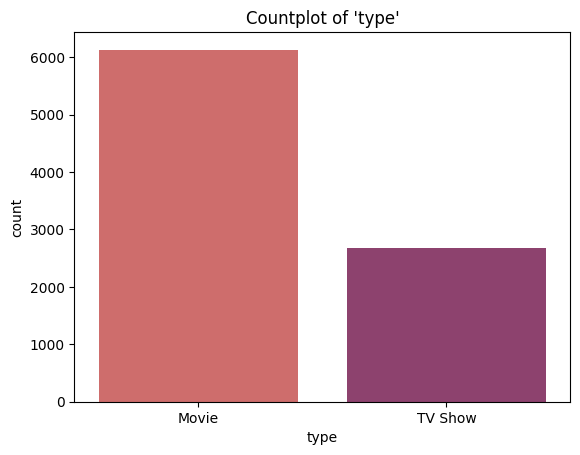

In [11]:
sns.countplot(x=df['type'], hue = df['type'], legend = False, palette = 'flare') # countplot of 'type'
plt.title("Countplot of 'type'")
plt.show()

In [12]:
df['date_added_year'].value_counts().sort_index() # checking value counts of 'date_added_year'

date_added_year
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: count, dtype: int64

In [13]:
type_year = df.groupby('type')['date_added_year'].value_counts().unstack() # grouping 'type' on the basis of 'date_added_year'
type_year

date_added_year,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
type,,,,,,,,,,,,,,
Movie,1.0,2.0,1.0,13.0,3.0,6.0,19.0,56.0,253.0,839.0,1237.0,1424.0,1284.0,993.0
TV Show,1.0,NaN,NaN,NaN,NaN,5.0,5.0,26.0,176.0,349.0,412.0,592.0,595.0,505.0


In [14]:
type_year.columns # column check

Index([2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0,
       2017.0, 2018.0, 2019.0, 2020.0, 2021.0],
      dtype='float64', name='date_added_year')

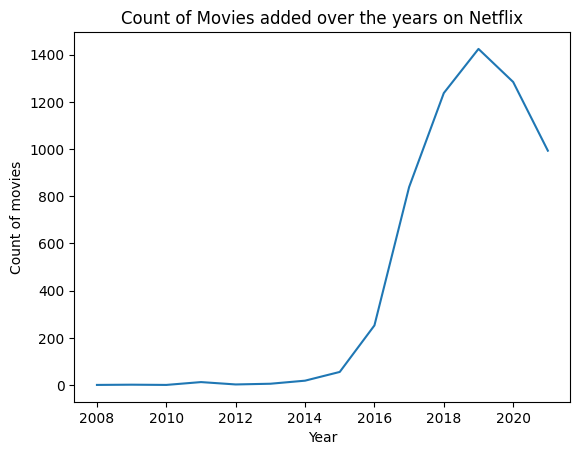

In [15]:
sns.lineplot(x = [2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0,  # Visualizing Movie trend over the years
       2017.0, 2018.0, 2019.0, 2020.0, 2021.0], y = type_year.iloc[0])
plt.title('Count of Movies added over the years on Netflix')
plt.ylabel('Count of movies')
plt.xlabel('Year')
plt.show()

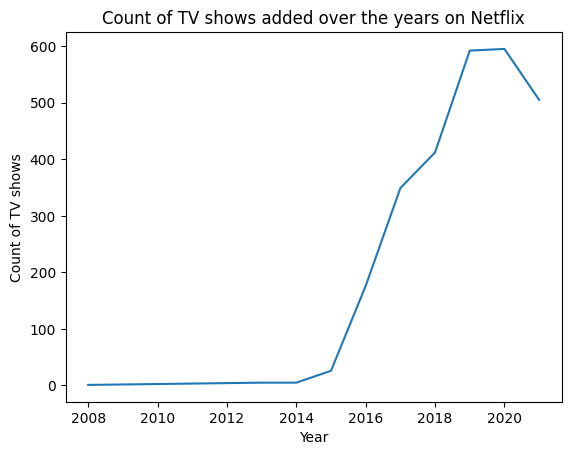

In [16]:
sns.lineplot(x = [2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, # Visualizing TV shows trend over the year
       2017.0, 2018.0, 2019.0, 2020.0, 2021.0], y = type_year.iloc[1])
plt.title('Count of TV shows added over the years on Netflix')
plt.ylabel('Count of TV shows')
plt.xlabel('Year')
plt.show()

## Observations from the above plots:
- ### The count of Movies is more than the count of TV Shows since the count of Movies available in this dataset are twice of the count of TV Shows. Also, movies along with TV shows were added more in the year 2019 which can be seen in the line plots.

- ### It can be seen in the line plot of TV show that there was no trend of adding content on Netflix before the year 2015, which means that OTT platforms weren't in that hype as they are now. At present, these platforms are more popular for streaming TV shows.

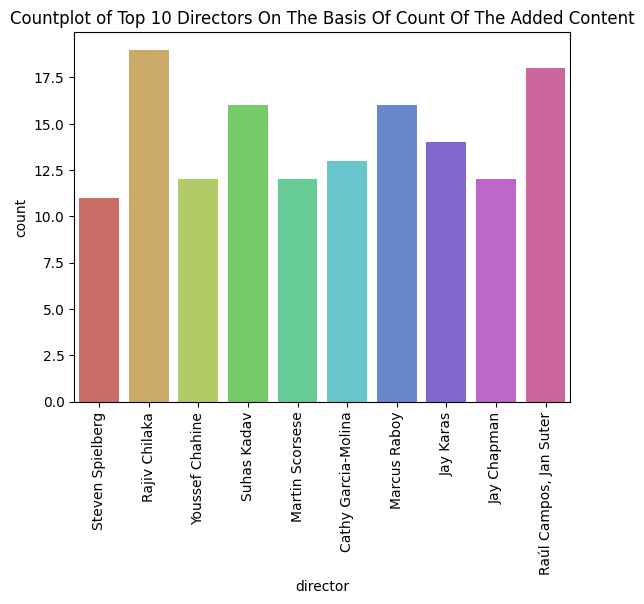

In [17]:
top_directors_count = df['director'].value_counts().sort_values(ascending= False).head(10) # capturing the top 10 directors on the basis of movie or tv show count.

top_directors_index = top_directors_count.index

topDirectorsDf = df[df['director'].isin(top_directors_index)] # creating a dataframe of top 10 directors on the basis of movie or tv show count.


# countplot of top_directors_count
sns.countplot(x=topDirectorsDf['director'],hue = topDirectorsDf['director'], legend = False, palette = 'hls')
plt.title("Countplot of Top 10 Directors On The Basis Of Count Of The Added Content")
plt.xticks(rotation = 90)
plt.show()

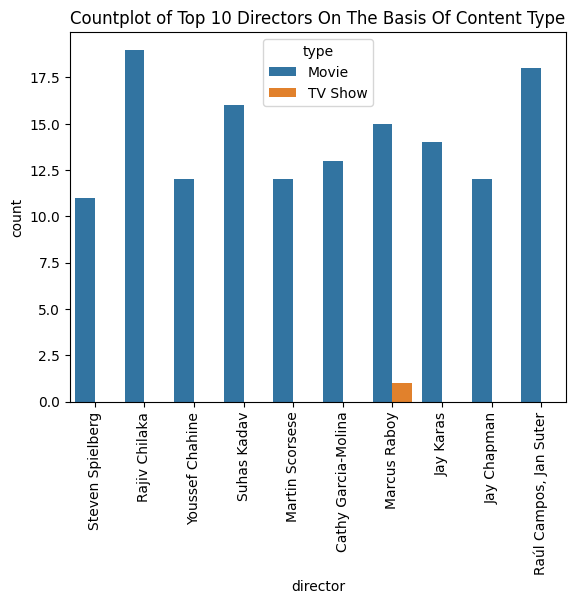

In [18]:
sns.countplot(x=topDirectorsDf['director'], hue = df['type']) # creating a countplot of top 10 directors on the basis of 'type'
plt.xticks(rotation = 90)
plt.title("Countplot of Top 10 Directors On The Basis Of Content Type")
plt.show()

## Observations from the above countplot:
- ### Rajiv Chilaka, Raúl Campos, Jan Suter, Suhas Kadav, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Martin Scorsese, Youssef Chahine, Jay Chapman and Steven Spielberg have made a large number of content which is available on Netflix and Rajiv Chilaka is leading in terms of more content created.

- ### Every director has created Movies except Marcus Raboy who has created a TV Show.


In [19]:
topFeaturedCast = df['cast'].value_counts().sort_values(ascending=False).head(10).index # capturing top 10 featured cast
top_cast_df = df[df['cast'].isin(topFeaturedCast)]
topFeaturedCast

Index(['David Attenborough',
       'Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil',
       'Samuel West', 'Jeff Dunham',
       'Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath',
       'Kevin Hart', 'Craig Sechler',
       'David Spade, London Hughes, Fortune Feimster', 'Jim Gaffigan',
       'Bill Burr'],
      dtype='object', name='cast')

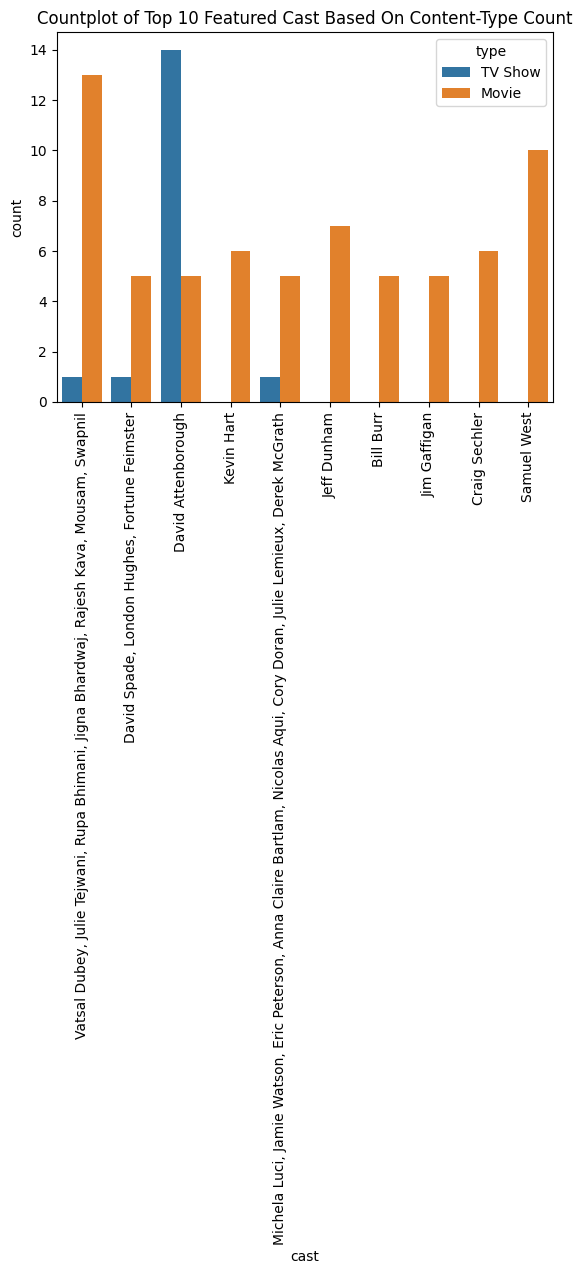

In [20]:
sns.countplot(x=top_cast_df['cast'], hue = top_cast_df['type']) # creating countplot of top featured cast
plt.xticks(rotation = 90)
plt.title("Countplot of Top 10 Featured Cast Based On Content-Type Count")
plt.show()

In [21]:
import plotly.express as px

df_filtered = df[df['cast'].isin(df['cast'].value_counts().head(10).index)]  # creating a Tree map of top 10 cast members and their titles
fig = px.treemap(df_filtered, path=['cast', 'title'], title='Treemap of Top 10 Cast Members and Their Titles')
fig.show()


## Observations:
- ### David Attenborough is the most featured actor on Netflix with 14 TV Shows and 5 Movies. It seems interesting that the TV shows and movies in which he got featured are based on the planet Earth and nature (this observation can be seen from the above tree map).

- ### One of the interesting observation is that Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam and Swapnil which is the most featured cast have gained a huge popularity on Netflix because of various Chhota Bheem movies which they have created together and which are loved by the kids.

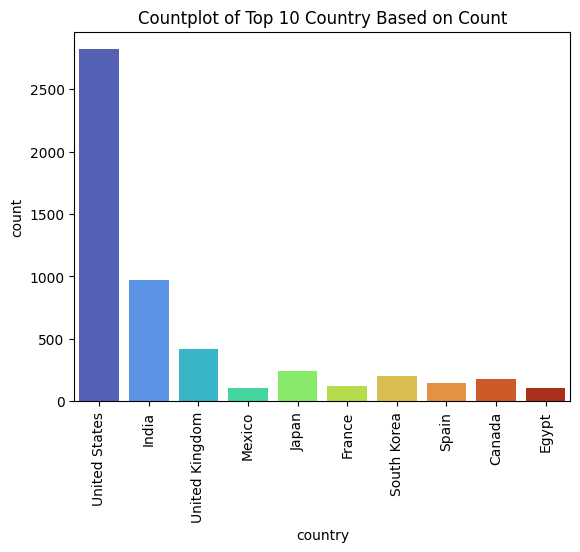

In [22]:
top_countries_count = df['country'].value_counts().sort_values(ascending=False).head(10) # capturing top 10 countries count and creating the countplot of the same
top_countries_count_df = df[df['country'].isin(top_countries_count.index)]

sns.countplot(x = top_countries_count_df['country'], hue = top_countries_count_df['country'], legend = False, palette = 'turbo')
plt.xticks(rotation = 90)
plt.title("Countplot of Top 10 Country Based on Count")
plt.show()

## Observations:

- ### United States seems to be the most favorable destination for directors for creating movies and tv show content, also, this may suggest that most of the directors are native to the US.

- ### India ranks 2nd among one of the top content created region.

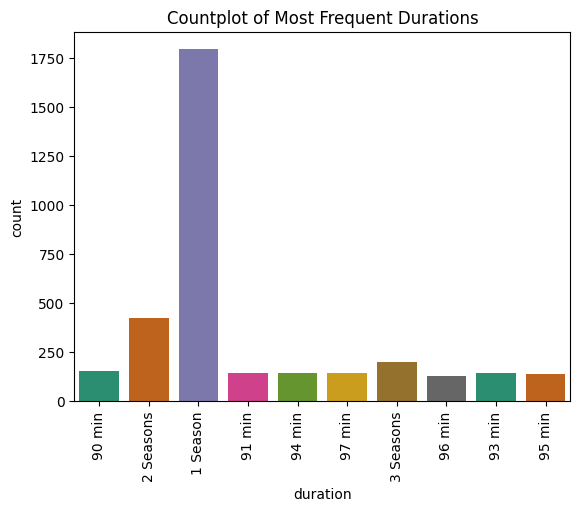

In [23]:
top_duration_count = df['duration'].value_counts().sort_values(ascending=False).head(10) # capturing the most frequent durations and creating the countplot of the same
top_duration_count_df = df[df['duration'].isin(top_duration_count.index)]

sns.countplot(x = top_duration_count_df['duration'], hue = top_duration_count_df['duration'], legend = False, palette = 'Dark2')
plt.xticks(rotation = 90)
plt.title("Countplot of Most Frequent Durations")
plt.show()

## Observation:
- ### Since TV Shows that have 1 season of duration are highly available on Netflix, this indicates that most of the TV show content on Netflix was recently added. Note that the dataset is based on 2021.

In [24]:
print(df['rating'].value_counts()) # checking the unique values in 'rating' feature

df = df[(df['rating'] != '74 min') & (df['rating'] != '84 min') & (df['rating']!= '66 min')] # filtering the 'rating' feature by removing the errors
df['rating'].value_counts().sort_values(ascending = False)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [25]:
df_genre = df.assign(genre = df['listed_in'].str.split(',')).explode('genre') # splitting the genre by commas and capturing the unique genre
df_genre['genre'] = df_genre['genre'].str.strip() # removing whitespaces from every genre

In [26]:
df_genre # displaying the dataframe

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,International TV Shows
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,TV Dramas
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,Children & Family Movies
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,Comedies
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,Dramas
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,International Movies


In [27]:
genre_type = pd.crosstab(df_genre['genre'], df_genre['type']) # creating a crosstab of the 'genre' and 'type'
genre_type

type,Movie,TV Show
genre,,
Action & Adventure,859,0
Anime Features,71,0
Anime Series,0,176
British TV Shows,0,253
Children & Family Movies,641,0
Classic & Cult TV,0,28
Classic Movies,116,0
Comedies,1674,0
Crime TV Shows,0,470


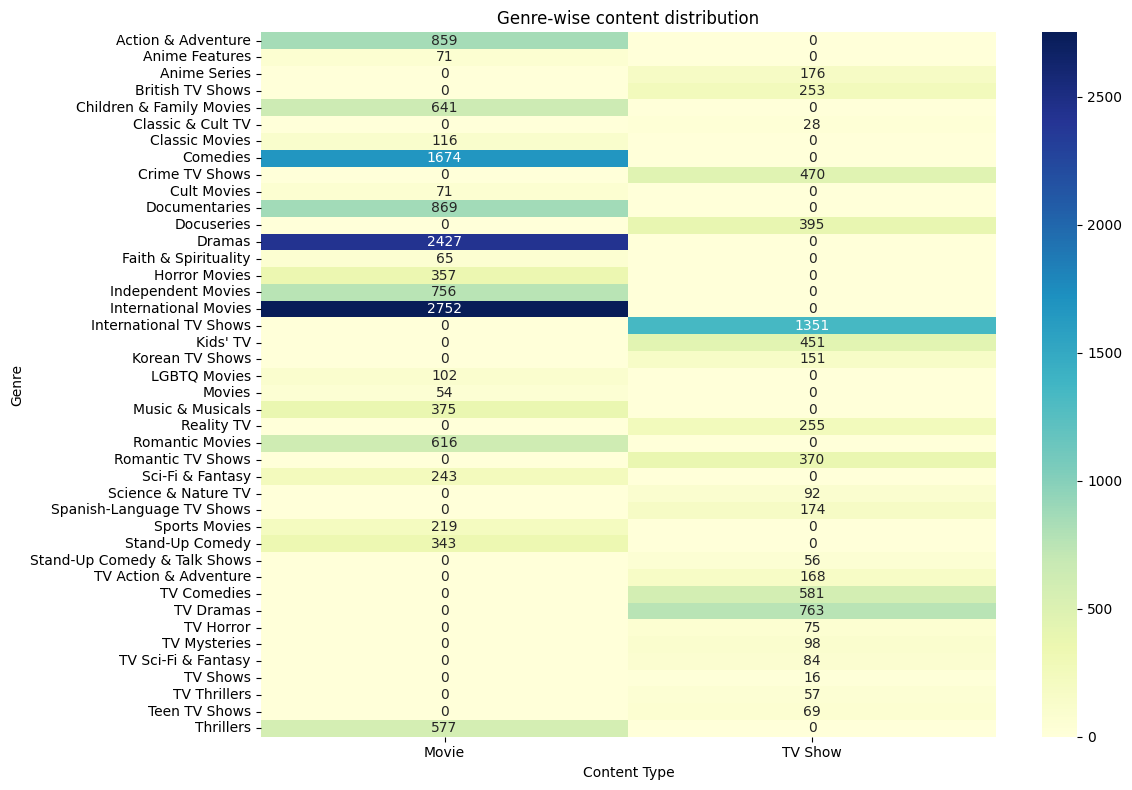

In [ ]:
# creating a heatmap of the crosstab
plt.figure(figsize=(12,8))
sns.heatmap(genre_type, annot=True, fmt='d', cmap='YlGnBu') # annot = True will show colors on the values and fmt = 'd' will show those numbers
plt.title("Genre-wise content distribution")
plt.ylabel("Genre")
plt.xlabel("Content Type")
plt.tight_layout()
plt.show()


## Observations in accordance to the above heatmap:
- ### Genres such as International Movies, Dramas, Comedies and International TV Shows are highly prevalent on Netflix.
- ### Also, a variety of content is available across various genres, making it ideal for family entertainment and quality time.

In [29]:
rating_count= df['rating'].value_counts()
top_ratings = rating_count[:9] # capturing top 9 ratings which are unique


In [30]:
other_count= rating_count[9:].sum() # creating a separate index named 'others' for the ratings that are not in the top_ratings list
top_ratings['others'] = other_count 
top_ratings

rating
TV-MA     3207
TV-14     2160
TV-PG      863
R          799
PG-13      490
TV-Y7      334
TV-Y       307
PG         287
TV-G       220
others     133
Name: count, dtype: int64

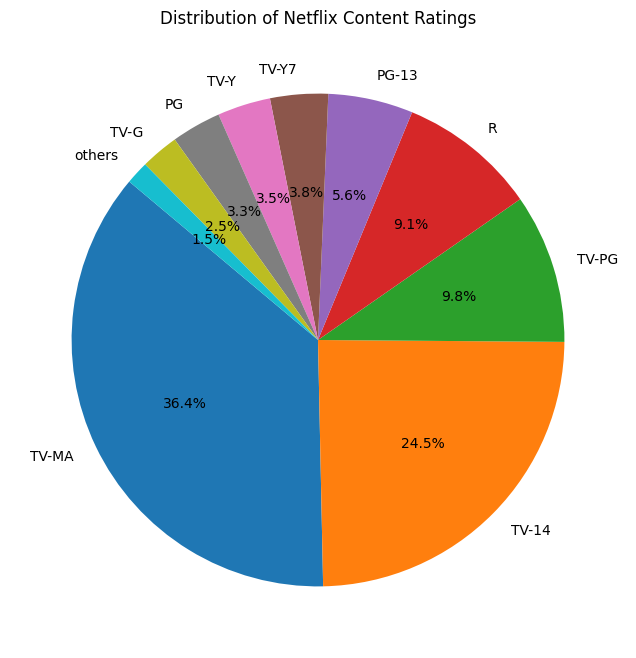

In [31]:
# creating a pie chart of the top 9 frequently listed ratings
plt.figure(figsize=(12,8))
plt.pie(top_ratings, labels = top_ratings.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Netflix Content Ratings')
plt.show()

## The above visualization helps to conclude that:

- ### It is evident that the content of 'TV-MA' rating is high which is for the mature audience.

- ### 'TV - 14' is also highly available which reveals that Netflix is more focused towards uploading contents for teenage and adult audiences.

- ### As shown in the figure the content for kids and general audience is very less(TV-G, PG, TV-Y, TV-Y7, PG-13, etc.). This insight can be advantageous for Netflix as it can be leveraged to add more content for the general audiences.